In [110]:
import pandas as pd
import re

In [111]:
df1=pd.read_csv('movies_stats.csv')
df=df1
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [112]:
def production_year(movie):
    y=1900
    years=range(1950,2011)
    for year in years:
        if str(year) in movie:
            y=year
    return y

In [113]:
df['year']=df['title'].apply(production_year)
df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,1900
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989


In [114]:
df1=df.groupby('year')['rating'].mean().reset_index().sort_values('rating', ascending=False)

In [115]:
df1=df1[df1['year']!=1900]
df1

,year,rating
8,1957,4.014241
23,1972,4.011136
3,1952,4.000000
25,1974,3.999058
5,1954,3.994220
...,...,...
56,2005,3.448434
54,2003,3.444777
47,1996,3.426600
48,1997,3.415764


In [116]:
from matplotlib import pyplot as plt
import plotly.graph_objects as go

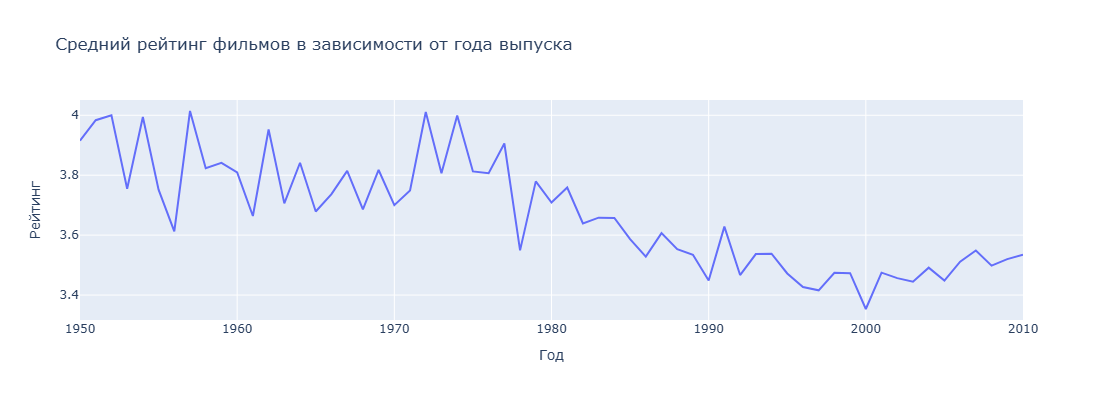

In [117]:
df1=df1.sort_values('year', ascending=False)
line=go.Scatter(x=df1['year'],y=df1['rating'],mode='lines')
fig=go.Figure(data=line)
fig.update_layout(
    autosize=False,
    width=700,
    height=400,
    title='Средний рейтинг фильмов в зависимости от года выпуска',
    xaxis_title='Год',
    yaxis_title='Рейтинг'
)
fig.show()

In [74]:
### Да, мы видим, что с ростом года выпуска фильма средний рейтинг становится ниже ###